In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This function finds L_j(x)
# Inputs: node points (I also call them mesh points) xnodes, index jj, and query point xquery

def lfun(xnodes,jj,xquery):
    lvals = np.ones(xquery.size)
    # Find the j^th node
    xnodesjj = xnodes[jj]
    # We need to build a list of node points which does not include xjj
    xnodesrem = xnodes[:jj]
    xnodesrem = np.append(xnodesrem,xnodes[(jj+1):])
    denominator = np.prod(xnodesjj-xnodesrem)
    for val in xnodesrem:
        lvals *= (xquery-val)
    return lvals/denominator

# This function finds p_n(x)
# Inputs: data points xnodes and fvals, and query point x

def lagrange_interpolator(xnodes,fvals,xquery):
    n = fvals.size
    ipoly = np.zeros(xquery.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xnodes,jj,xquery)
    return ipoly

**Problem 1**: 10 pts - For the function

$$
f(x) = \frac{x^{2}}{1+x^{4}}, ~ -1 \leq x \leq 1
$$

a) (2pts) Using an equispaced set of $10$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

b) (2pts) Using an equispaced set of $20$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

c) (2pts) At what number of equispaced nodes does your Lagrange interpolation approximation break down?  

d) (4pts) Does using Chebyshev points help resolve the issues you saw in c) ?  Provide examples to verify your claim.

In [3]:
fun = lambda x: x**2./(1.+x**4.)
xquery = np.linspace(-1.,1.,int(1e3)+1)
ftrue = fun(xquery)

## Equi-Spaced Experiments

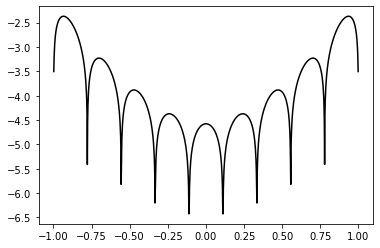

In [5]:
xnodes = np.linspace(-1.,1.,10)
fvals = fun(xnodes)
finterp = lagrange_interpolator(xnodes,fvals,xquery)
plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

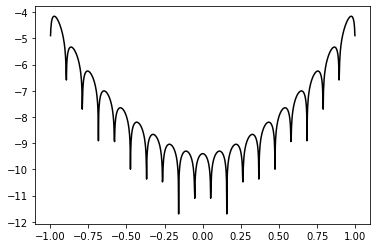

In [6]:
xnodes = np.linspace(-1.,1.,20)
fvals = fun(xnodes)
finterp = lagrange_interpolator(xnodes,fvals,xquery)
plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

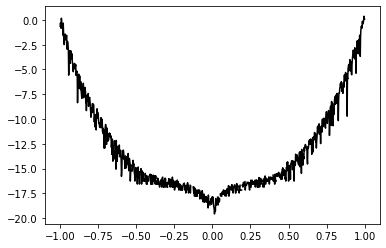

In [12]:
xnodes = np.linspace(-1.,1.,70)
fvals = fun(xnodes)
finterp = lagrange_interpolator(xnodes,fvals,xquery)
plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

## Chebyshev Experiments

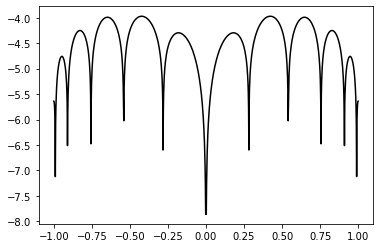

In [7]:
ncheb = 10
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = fun(xcheb)
finterp = lagrange_interpolator(xcheb,fcheb,xquery)
plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

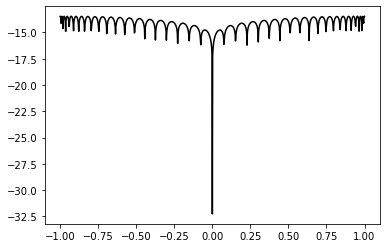

In [16]:
ncheb = 40
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = fun(xcheb)
finterp = lagrange_interpolator(xcheb,fcheb,xquery)
plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

### Discussion

So as we see, using equispaced points, we see reasonable performance for $n=10$ and $n=20$ nodes so long as we ignore the wild disparity in accuracy across the computational domain.  However, by the time we get to $n=70$ nodes, we can no longer ignore the piling up of error at the boundaries of our computational domain.  

In contrast, using Chebyshev nodes, we get markedly better performance, acheiving nearly uniform machine precision with only 40 nodes.  So, clustering in clever ways saves the day, as we would expect from lecture and lab.  

**Problem 2**: 7 pts - Given three interpolation points $\left\{(x_{j},f_{j})\right\}_{j=0}^{2}$, suppose they are equi-spaced, so that 
$$
\delta x = x_{1}-x_{0} = x_{2} - x_{1}.
$$

Show that (1 pt each)
<ol>
        <li> $L^{(2)}_{0}(x) = \frac{1}{2(\delta x)^{2}}(x-x_{1})(x-x_{2})$.
        <li> $\left.\frac{d}{dx}L^{(2)}_{0}(x)\right|_{x=x_{0}} = -\frac{3}{2\delta x}$.
        <li> $L^{(2)}_{1}(x) = -\frac{1}{(\delta x)^{2}}(x-x_{0})(x-x_{2})$
        <li> $\left.\frac{d}{dx}L^{(2)}_{1}(x)\right|_{x=x_{0}} = \frac{2}{\delta x}$.            
        <li> $L^{(2)}_{2}(x) = -\frac{1}{(\delta x)^{2}}(x-x_{0})(x-x_{1})$
        <li> $\left.\frac{d}{dx}L^{(2)}_{2}(x)\right|_{x=x_{0}} = -\frac{1}{2\delta x}$.            
</ol>

From this, find the approximation $f'(x_{0}) \approx p_{2}'(x_{0})$ (1 pt).  

**Problem 3**: 7 pts - Repeat the above problem, but now evaluate everything at $x_{1}$ and find the approximation $f'(x_{1}) \approx p_{2}'(x_{1})$.   